In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


# Data into tensorflow dataset

In [3]:
import splitfolders
splitfolders.ratio('PlantVillage', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 2152 files [00:16, 126.66 files/s]


In [4]:
imgsize = 256
cs = 3

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_td = ImageDataGenerator(
        rescale=1./255,
        rotation_range=180,
        horizontal_flip=True
)
generator_td = datagen_td.flow_from_directory(
        'output/train',
        target_size=(imgsize,imgsize),
        batch_size=32,
        class_mode="sparse",
)

Found 1721 images belonging to 3 classes.


In [6]:
generator_td.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [7]:
class_nm= list(generator_td.class_indices.keys())
class_nm

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [8]:
count=0
for image_batch, label_batch in generator_td:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.6318948  0.6240517  0.667189  ]
  [0.6027387  0.5934365  0.63657373]
  [0.63744825 0.62568355 0.66882086]
  ...
  [0.744913   0.744913   0.7919718 ]
  [0.74463505 0.74463505 0.79169387]
  [0.74380195 0.74380195 0.7908608 ]]

 [[0.6306451  0.62280196 0.6659392 ]
  [0.6131534  0.6042678  0.647405  ]
  [0.6095367  0.597772   0.64090925]
  ...
  [0.7376695  0.7376695  0.78472835]
  [0.7380922  0.7380922  0.785151  ]
  [0.73975855 0.73975855 0.7868174 ]]

 [[0.6293953  0.62155217 0.6646894 ]
  [0.6235682  0.61509913 0.6582364 ]
  [0.5816252  0.5698605  0.6129978 ]
  ...
  [0.75202334 0.75202334 0.79908216]
  [0.75350255 0.75350255 0.80056137]
  [0.75475234 0.75475234 0.80181116]]

 ...

 [[0.59670305 0.6045462  0.6555266 ]
  [0.60003585 0.607879   0.6588594 ]
  [0.6033685  0.61121166 0.66219205]
  ...
  [0.68490535 0.6809838  0.7437289 ]
  [0.66591173 0.66199017 0.72473526]
  [0.6546725  0.65075094 0.713496  ]]

 [[0.6504599  0.6532893  0.7017628 ]
  [0.65754193 0.65953815 0.7075951 ]


In [9]:
datagen_val = ImageDataGenerator(
        rescale=1./255,
        rotation_range=180,
        horizontal_flip=True)
generator_val = datagen_val.flow_from_directory(
        'output/val',
        target_size=(imgsize,imgsize),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [10]:
datagen_tst = ImageDataGenerator(
        rescale=1./255,
        rotation_range=180,
        horizontal_flip=True)
generator_tst = datagen_tst.flow_from_directory(
        'output/test',
        target_size=(imgsize,imgsize),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in generator_tst:
    print(image_batch[0])
    break

[[[0.5018605  0.44695854 0.505782  ]
  [0.5065975  0.45169553 0.5105191 ]
  [0.45869485 0.4037929  0.4626164 ]
  ...
  [0.44914976 0.40209094 0.4569929 ]
  [0.44560465 0.39854583 0.4534478 ]
  [0.4409818  0.39392298 0.44882494]]

 [[0.5172226  0.46232066 0.52114415]
  [0.4971439  0.4422419  0.50106543]
  [0.4882374  0.43333545 0.49215898]
  ...
  [0.4327265  0.38566768 0.44056964]
  [0.4256363  0.37857747 0.43347943]
  [0.42102358 0.37396476 0.4288667 ]]

 [[0.5325847  0.4776828  0.5365063 ]
  [0.48769027 0.43278828 0.49161184]
  [0.51760453 0.4627026  0.5215261 ]
  ...
  [0.43203068 0.38497186 0.4398738 ]
  [0.44148427 0.39442545 0.4493274 ]
  [0.4509379  0.40387908 0.45878103]]

 ...

 [[0.57627416 0.5605879  0.6194114 ]
  [0.58336437 0.5676781  0.6265016 ]
  [0.5900847  0.5743984  0.6332219 ]
  ...
  [0.61140805 0.5957218  0.6545453 ]
  [0.6103941  0.59470785 0.6535314 ]
  [0.6188709  0.60318464 0.66200817]]

 [[0.5969641  0.58127785 0.6401014 ]
  [0.6028726  0.58718634 0.6460099 ]


# Building the Model

In [12]:
input_shape = (imgsize, imgsize, cs)
n_classes = 3
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(n_classes, activation='softmax'),
    ])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 123, 123, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 121, 121, 64)      36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 119, 119, 64)      36928     
                                                        

In [14]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
    generator_td,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=generator_val,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 192s 4s/step - loss: 0.8663 - accuracy: 0.6005 - val_loss: 0.6275 - val_accuracy: 0.7448
Epoch 2/20
47/47 [==============================] - 170s 4s/step - loss: 0.4827 - accuracy: 0.8377 - val_loss: 0.3662 - val_accuracy: 0.8594
Epoch 3/20
47/47 [==============================] - 170s 4s/step - loss: 0.3798 - accuracy: 0.8544 - val_loss: 0.3132 - val_accuracy: 0.9323
Epoch 4/20
47/47 [==============================] - 174s 4s/step - loss: 0.3759 - accuracy: 0.8684 - val_loss: 0.2549 - val_accuracy: 0.9167
Epoch 5/20
47/47 [==============================] - 171s 4s/step - loss: 0.3153 - accuracy: 0.8884 - val_loss: 0.2333 - val_accuracy: 0.9062
Epoch 6/20
47/47 [==============================] - 163s 3s/step - loss: 0.1646 - accuracy: 0.9392 - val_loss: 0.3866 - val_accuracy: 0.8854
Epoch 7/20
47/47 [==============================] - 154s 3s/step - loss: 0.2096 - accuracy: 0.9279 - val_loss: 0.1981 - val_accuracy: 0.9323
Epoch 8/20
47

# Test Score

In [16]:
scores = model.evaluate(generator_tst)

7/7 [==============================] - 7s 1s/step - loss: 0.0703 - accuracy: 0.9815


In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Accuracy and loss curves

In [18]:
accuracy = history.history['accuracy']
value_accuracy = history.history['val_accuracy']

loss = history.history['loss']
value_loss = history.history['val_loss']

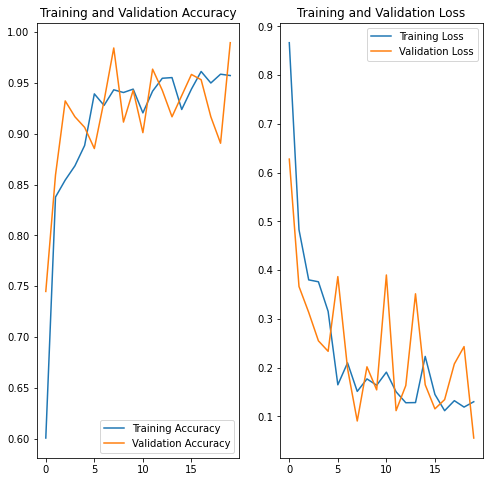

In [19]:
es = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(es), accuracy, label='Training Accuracy')
plt.plot(range(es), value_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(es), loss, label='Training Loss')
plt.plot(range(es), value_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing for sample images

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


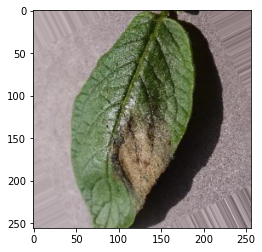

In [20]:
import numpy as np


for ib, lb in generator_tst:
    image1 = ib[0]
    label1 = int(lb[0])
    
    print("first image to predict")
    plt.imshow(image1)
    print("actual label:",class_nm[label1])
    
    batch_pred = model.predict(ib)
    print("predicted label:",class_nm[np.argmax(batch_pred[0])])
    
    break

# Prediction for sample data to check the accuracy of our model

In [21]:
def prediction_vs_truevalue(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    pred = model.predict(img_array)

    pred_class = class_nm[np.argmax(pred[0])]
    true_percentage = round(100 * (np.max(pred[0])), 2)
    return pred_class, true_percentage

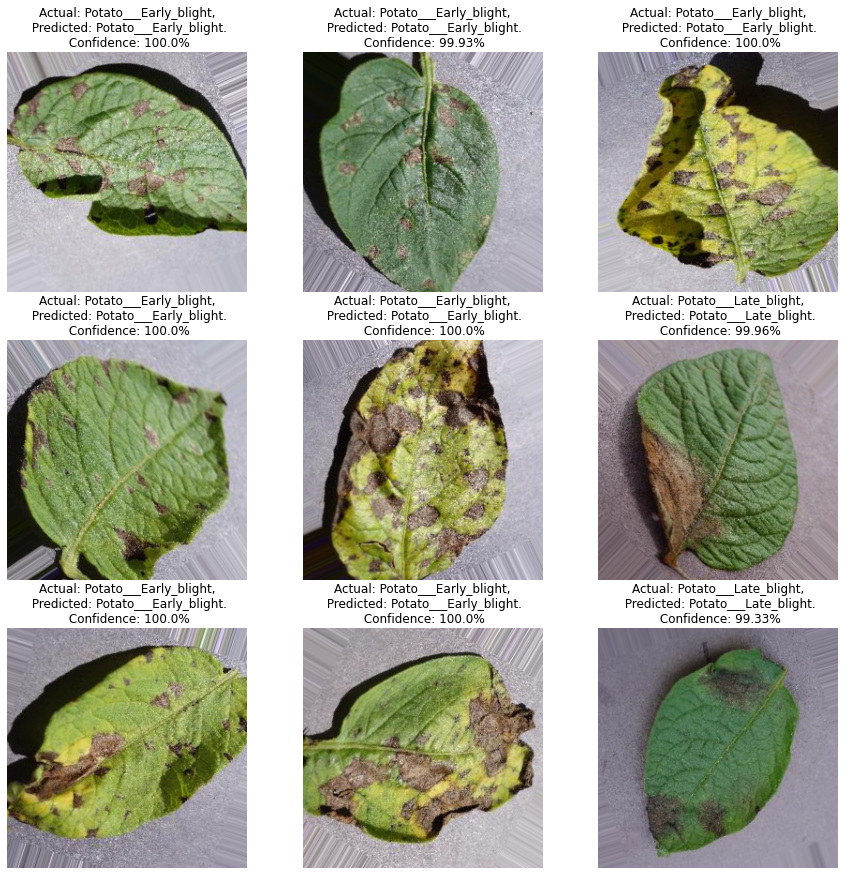

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in generator_tst:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        pred_class, true_percentage = prediction_vs_truevalue(model, images[i])
        actual_class = class_nm[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {pred_class}.\n Confidence: {true_percentage}%")
        
        plt.axis("off")
    break

In [23]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="red" if cm[i, j] > thresh else "grey")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

###reference: https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example

In [24]:
target_names = []

for key in generator_td.class_indices:

    target_names.append(key)

C:\Users\soura\AppData\Local\Temp\ipykernel_13204\4238339026.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator_tst,steps=216 // batchsize+1)


Confusion Matrix
Normalized confusion matrix


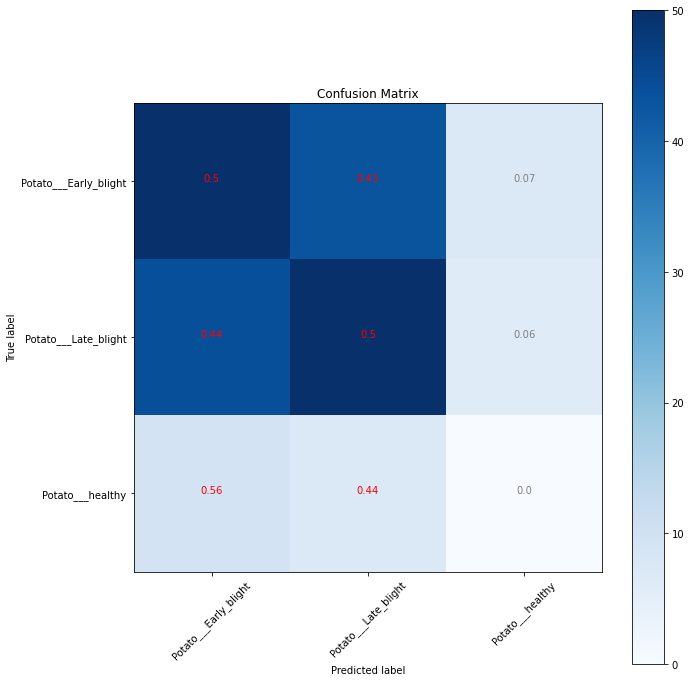

In [25]:
import sklearn
from sklearn.metrics import confusion_matrix
import itertools

batchsize = 32
Y_pred = model.predict_generator(generator_tst,steps=216 // batchsize+1)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = sklearn.metrics.confusion_matrix(generator_tst.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')